<a href="https://colab.research.google.com/github/Altair-01/AlainGames/blob/master/Bintou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Données du fichier excel
file_path = '/content/drive/MyDrive/Compotes_Ultimate.xlsx'
data = pd.read_excel(file_path)

Text(0, 0.5, 'Raisons')

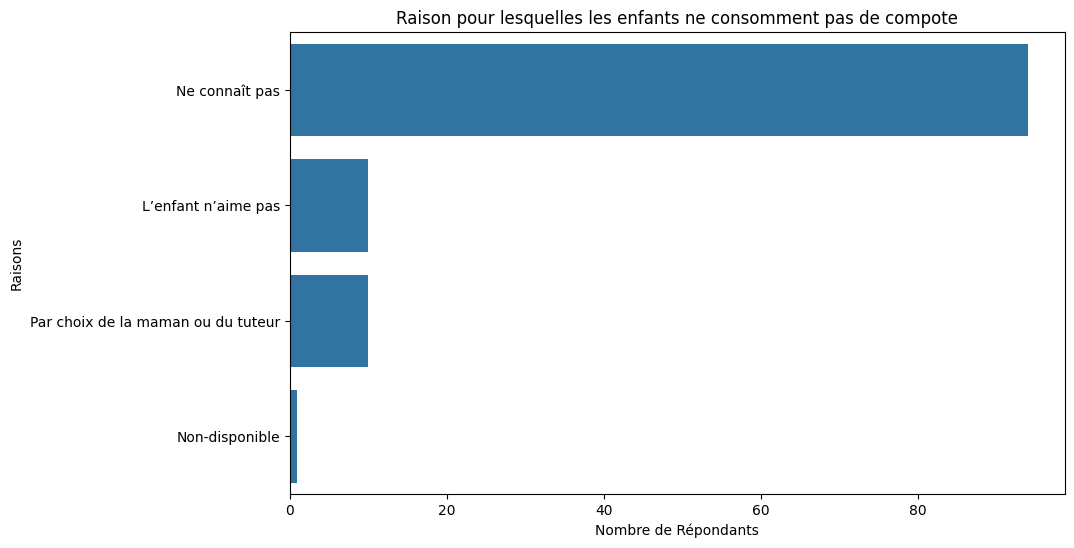

In [3]:
# 1. Raisons de Non-consommation
plt.figure(figsize=(10, 6))
sns.countplot(y='NonCompote', data=data)
plt.title('Raison pour lesquelles les enfants ne consomment pas de compote')
plt.xlabel('Nombre de Répondants')
plt.ylabel('Raisons')
#plt.show()


Text(0, 0.5, 'Raisons')

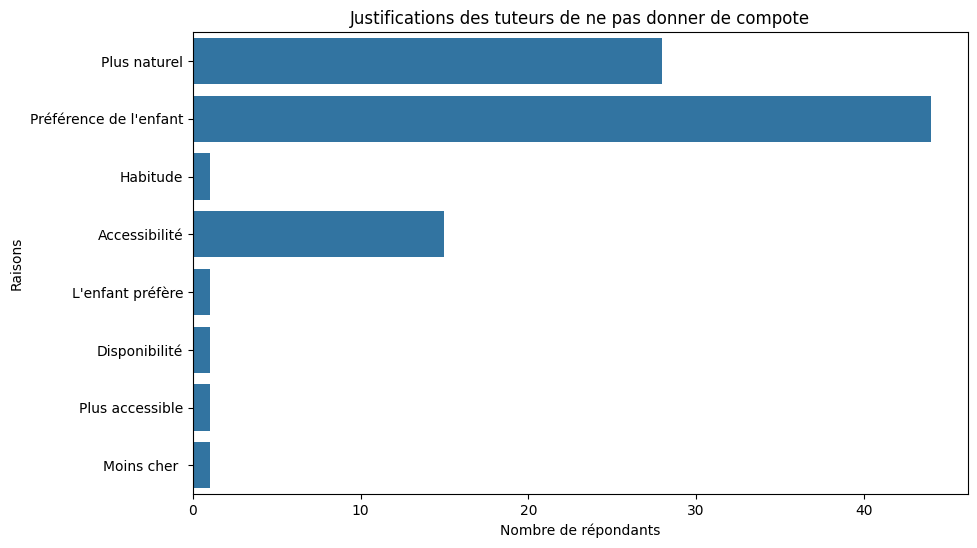

In [4]:
# 2. Justification choix du tuteur
plt.figure(figsize=(10, 6))
sns.countplot(y='Yalternative', data=data)
plt.title('Justifications des tuteurs de ne pas donner de compote')
plt.xlabel('Nombre de répondants')
plt.ylabel('Raisons')
#plt.show()


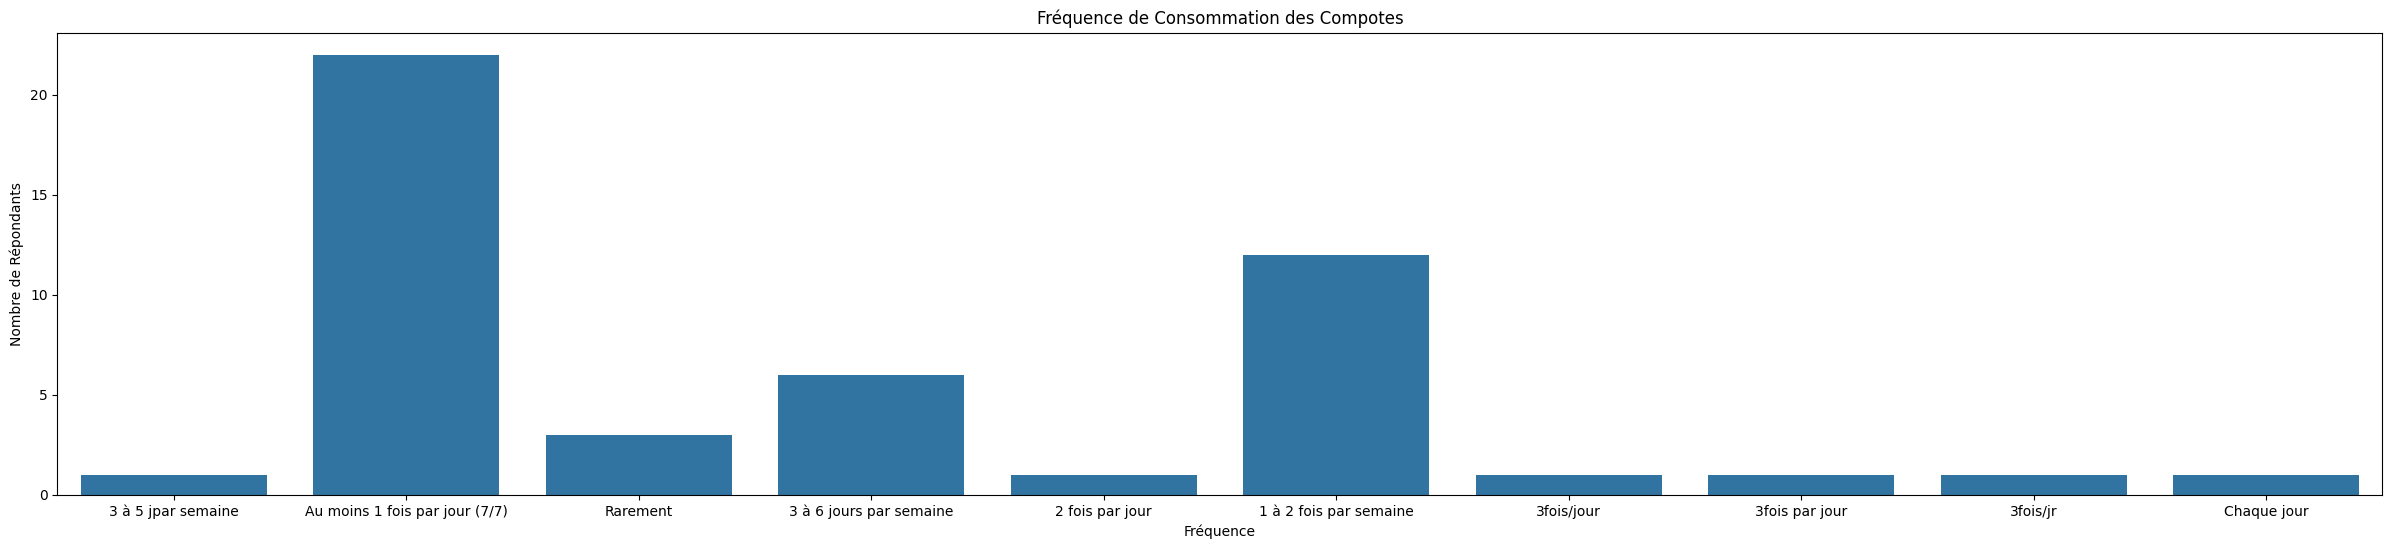

In [5]:
# 3. Fréquence de consommation des compotes
plt.figure(figsize=(30, 6))
sns.countplot(x='FreqCompote', data=data)
plt.title('Fréquence de Consommation des Compotes')
plt.xlabel('Fréquence')
plt.ylabel('Nombre de Répondants')
plt.show()

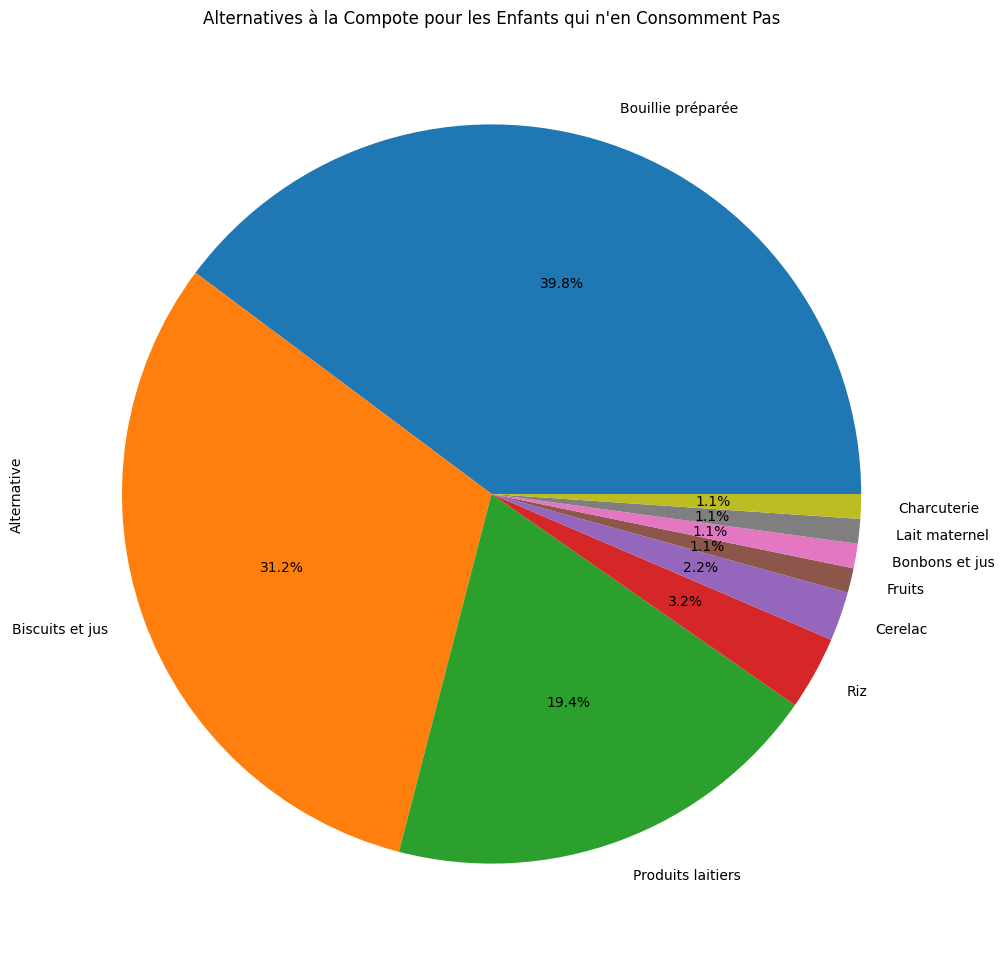

In [6]:
# 4. Camembert essai 2
compote_consumption_column = 'ConsCompote'
non_compote_column = "Alternative"
non_compote_data = data[data[compote_consumption_column] =='Non'][[non_compote_column]].dropna()
alternatives_count = non_compote_data[non_compote_column].value_counts(normalize=True)
alternatives_percentage = (alternatives_count / alternatives_count.sum()) * 100
plt.figure(figsize=(26, 12))
alternatives_percentage.plot(kind='pie',autopct='%1.1f%%')
plt.title('Alternatives à la Compote pour les Enfants qui n\'en Consomment Pas')
plt.xticks(rotation=45)
plt.show()

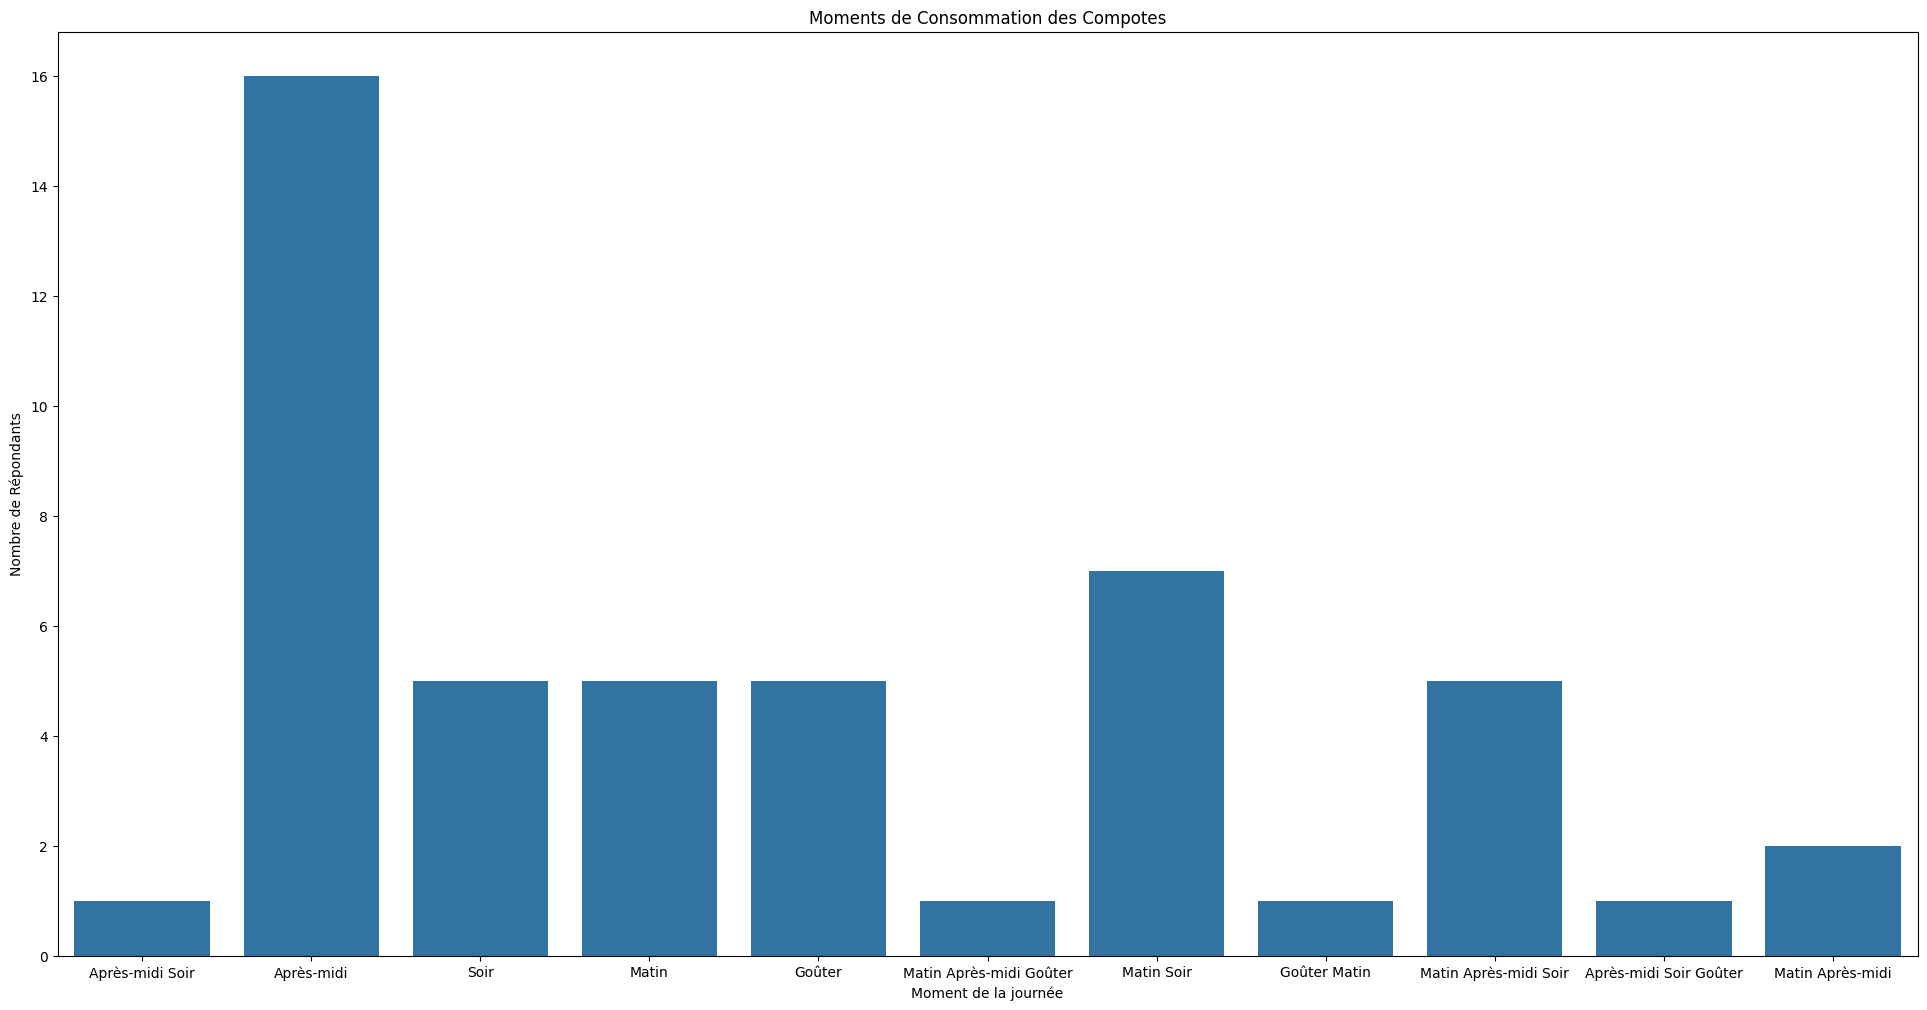

In [11]:
# 5. Moments de consommation PROBLEME
plt.figure(figsize=(24, 12))
sns.countplot(x='Moment ', data=data)
plt.title('Moments de Consommation des Compotes')
plt.xlabel('Moment de la journée')
plt.ylabel('Nombre de Répondants')
plt.show()

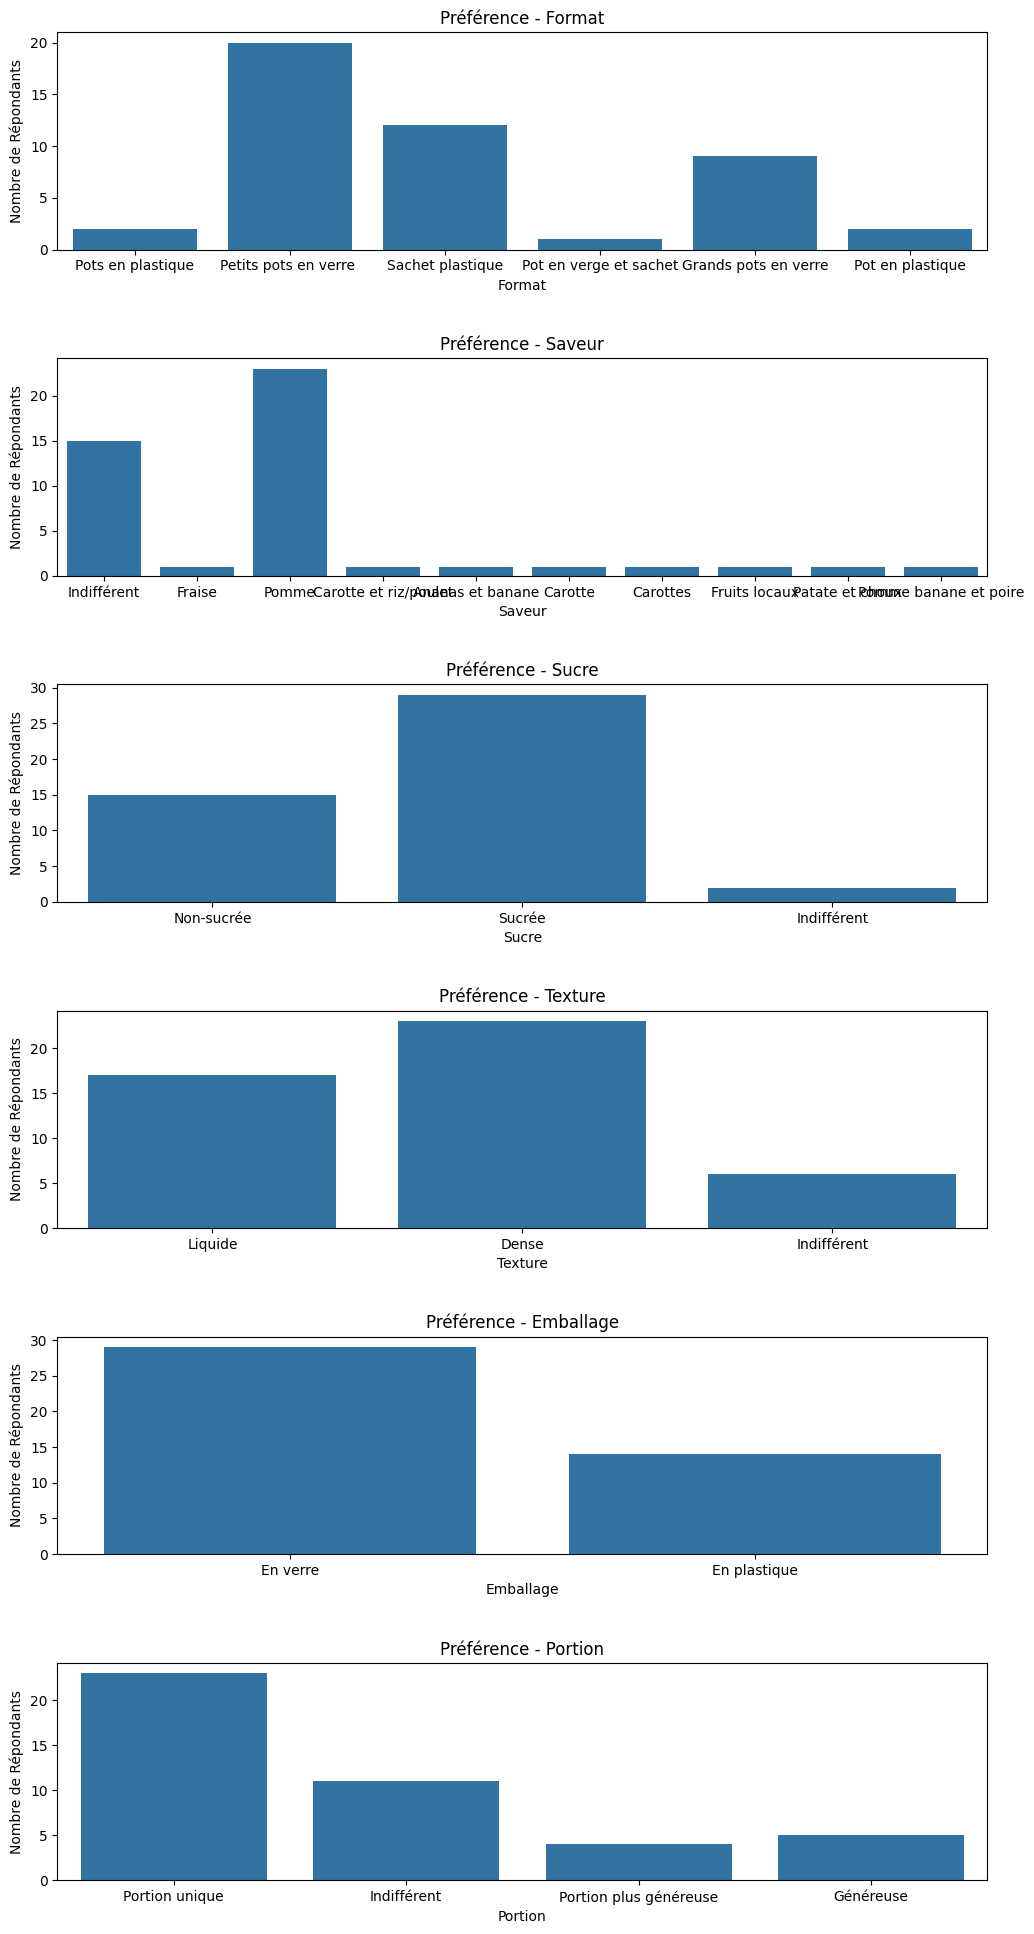

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

criteria_columns = ['Format', 'Saveur', 'Sucre', 'Texture', 'Emballage', 'Portion']

# Ajustez le paramètre hspace pour augmenter l'espace vertical entre les sous-graphiques
plt.figure(figsize=(12, 24))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(criteria_columns, start=1):
    plt.subplot(6, 1, i)
    sns.countplot(x=col, data=data)
    plt.title(f'Préférence - {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre de Répondants')

plt.show()



<ipython-input-72-d31f86084e1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PourcentageBudgetCompotes'] = (


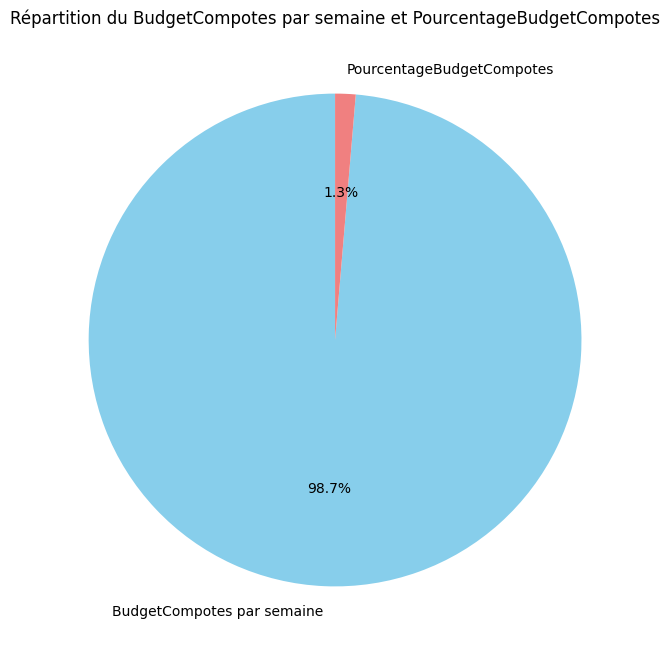

In [72]:
#7. Tranches de budget compotes Global
data['BudgetCompotes par semaine'] = pd.to_numeric(data['BudgetCompotes par semaine'], errors='coerce')
data['BudgetAlimentation par semaine (en FCFA) '] = pd.to_numeric(data['BudgetAlimentation par semaine (en FCFA) '], errors='coerce')

# Filtrez le dataframe pour ne conserver que les lignes où 'ConsCompote' est "oui"
filtered_data = data[data['ConsCompote'] == 'Oui']

# Calculez le pourcentage en évitant les divisions par zéro
filtered_data['PourcentageBudgetCompotes'] = (
    (filtered_data['BudgetCompotes par semaine'] / filtered_data['BudgetAlimentation par semaine (en FCFA) '])
    * 100
).where(filtered_data['BudgetAlimentation par semaine (en FCFA) '] != 0, 0)

# Créez le diagramme en secteurs
labels = ['BudgetCompotes par semaine', 'PourcentageBudgetCompotes']
sizes = [filtered_data['BudgetCompotes par semaine'].sum(), filtered_data['PourcentageBudgetCompotes'].sum()]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Répartition du BudgetCompotes par semaine et PourcentageBudgetCompotes')
plt.show()

<ipython-input-73-10b513bb9dc4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PourcentageBudgetCompotes'] = (


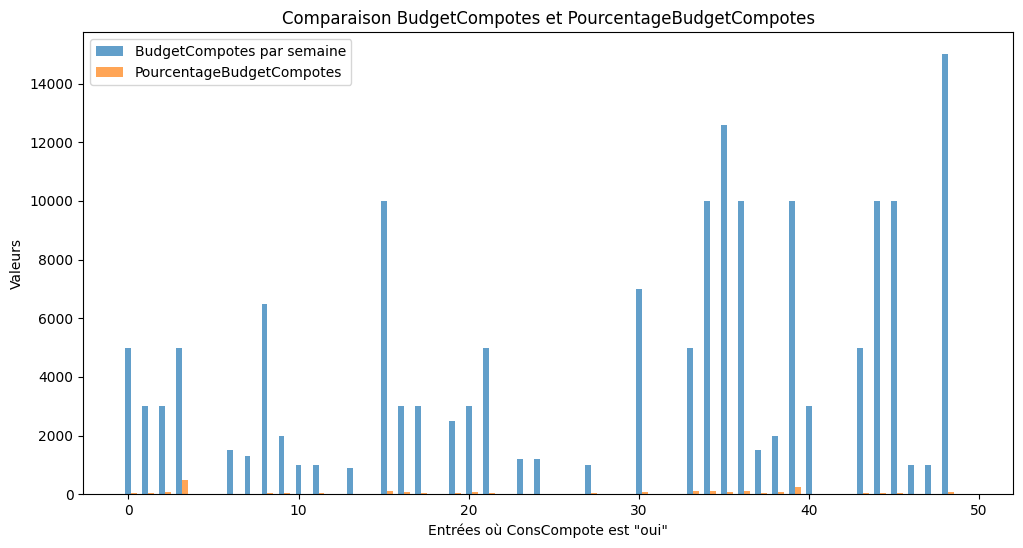

In [73]:

#7. Tranches de budget et part des compotes par foyer
# Convertissez les colonnes en types numériques
data['BudgetCompotes par semaine'] = pd.to_numeric(data['BudgetCompotes par semaine'], errors='coerce')
data['BudgetAlimentation par semaine (en FCFA) '] = pd.to_numeric(data['BudgetAlimentation par semaine (en FCFA) '], errors='coerce')

# Filtrez le dataframe pour ne conserver que les lignes où 'ConsCompote' est "oui"
filtered_data = data[data['ConsCompote'] == 'Oui']

# Calculez le pourcentage en évitant les divisions par zéro
filtered_data['PourcentageBudgetCompotes'] = (
    (filtered_data['BudgetCompotes par semaine'] / filtered_data['BudgetAlimentation par semaine (en FCFA) '])
    * 100
).where(filtered_data['BudgetAlimentation par semaine (en FCFA) '] != 0, 0)

# Créez le diagramme à barres comparant les deux colonnes
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_positions = range(len(filtered_data))

plt.bar(bar_positions, filtered_data['BudgetCompotes par semaine'], width=bar_width, label='BudgetCompotes par semaine', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], filtered_data['PourcentageBudgetCompotes'], width=bar_width, label='PourcentageBudgetCompotes', alpha=0.7)

plt.title('Comparaison BudgetCompotes et PourcentageBudgetCompotes')
plt.xlabel('Entrées où ConsCompote est "oui"')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

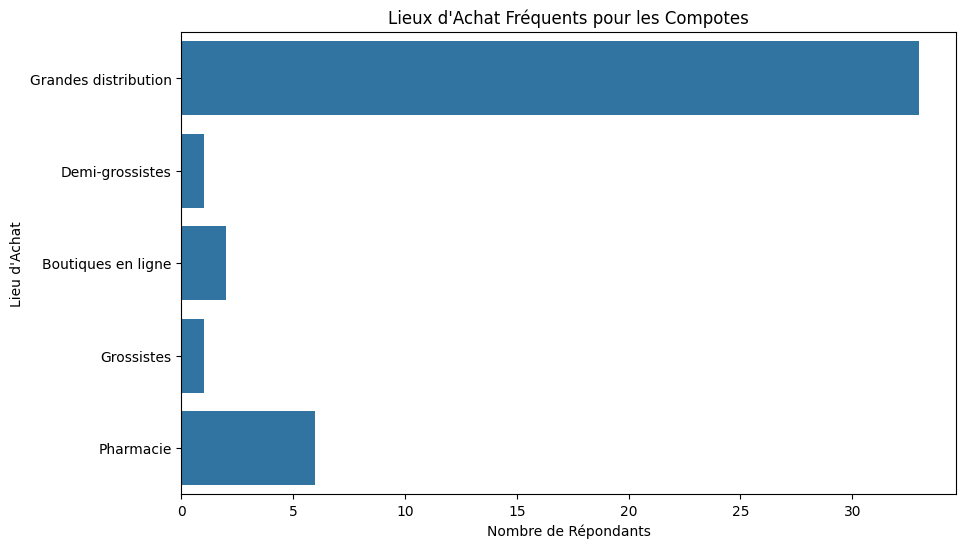

In [7]:
# 8. Lieux d'achat fréquents
plt.figure(figsize=(10, 6))
sns.countplot(y='LieuAchat', data=data)
plt.title('Lieux d\'Achat Fréquents pour les Compotes')
plt.xlabel('Nombre de Répondants')
plt.ylabel('Lieu d\'Achat')
plt.show()

In [80]:
!git clone https://github.com/jupyter/nbconvert.git
!cd nbconvert
!pip install -e ./drive/MyDrive/

fatal: destination path 'nbconvert' already exists and is not an empty directory.
Obtaining file:///content/drive/MyDrive
ERROR: file:///content/drive/MyDrive does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
